# Practica 2
## Ej 1.1 Paridad
### El problema de XOR es equivalente al problema de paridad para dos variables, es decir, el resultado es 1 solo cuando la cantidad de unos en la entrada es impar. Implementar un perceptrón multicapa que pueda aprender el problema de paridad para distintas cantidades de variables de entrada.
###Entrenarlo para 2, 4, 8 y 10 variables de entrada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from itertools import product

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def bias_add(V):
    bias = -np.ones( (len(V),1) )
    return np.concatenate( (V,bias), axis=1)
    #return np.hstack( [V,bias] ) # Funciona igual que lo de arriba

def bias_sub(V):
    return V[:,:-1] # Saco la ultima columna

### Empiezo con 2 variables de entrada y despues observo las otras

In [2]:
X = list( product( [0,1],repeat = 2 ) )
X = np.array(X) # Matrix 4x2 (P,Si)

Z = np.mod(np.sum(X, axis=1), 2) # Matriz de paridad
Z = np.array(Z).reshape(-1,1) # Matriz 4x1 (P,So)

# Una vez preparadas las entradas y salidas, queda armar los W1, W2 y entrenar el modelo
# Ademas ver que funcion de activacion es mas conveniente (Probar ReLu, sigmoid, etc)
# ReLu: Rectified Linear Unit

In [3]:
# P = 4, Si = 2, Sh = 1 (a eleccion, probar distintos valores) , So = 1
y0 = np.zeros((4,3)) # (P,Si+1)
y1 = np.zeros((4,2)) # (P,Sh+1)
y2 = np.zeros((4,1)) # (P,So)

np.random.seed(20)
w1 = np.random.normal(0,0.1,(3,1)) # (Si+1,Sh)
w2 = np.random.normal(0,0.1,(2,1)) # (Sh+1,So)

In [4]:
y0[:] = bias_add(X)
y1[:] = bias_add( np.tanh(np.dot( y0,w1 )) ) # Probar distintas funciones de activacion 
y2[:] = np.tanh( np.dot( y1, w2 ) ) # Probar distintas funciones de activacion

e2 = Z - y2
dY2 = 1 - y2**2 # Cambiar derivada al cambiar funcion de activacion
d2 = e2*dY2
eps = 0.5
delta_w2 = eps*np.dot(y1.T,d2)

e1 = np.dot(d2,w2.T)
dY1 = 1 - y1**2 # Cambiar derivada al cambiar funcion de activacion
d1 = bias_sub(e1*dY1)
delta_w1 = eps*np.dot(y0.T,d1)

w1 += eps*delta_w1
w2 += eps*delta_w2

In [5]:
error_2 = np.mean( np.square(e2))
error_2

0.4070573315363258

In [6]:
iter = 0
errores_2 = [error_2]
while error_2 > 0.01 and iter < 999:
    
    y1[:] = bias_add( np.tanh(np.dot( y0,w1 )) ) # Probar distintas funciones de activacion
    y2[:] = np.tanh( np.dot( y1, w2 ) ) # Probar distintas funciones de activacion
    
    e2 = Z - y2
    dY2 = 1-y2**2 # Cambiar derivada al cambiar funcion de activacion
    d2 = e2*dY2
    delta_w2 = eps*np.dot(y1.T,d2)

    e1 = np.dot(d2,w2.T)
    dY1 = 1-y1**2 # Cambiar derivada al cambiar funcion de activacion
    d1 = bias_sub(e1*dY1)
    delta_w1 = eps*np.dot(y0.T,d1)
    
    w1 += eps*delta_w1
    w2 += eps*delta_w2
    
    error_2 = np.mean( np.square(e2))
    
    errores_2.append(error_2)

    iter += 1
    
    if iter % 100 == 0: print(error_2,iter)

0.25000103244831146 100
0.2499995535954888 200
0.2499992231907798 300
0.2499988106335903 400
0.24999824366997112 500
0.24999749046305164 600
0.2499965138217652 700
0.24999525279134674 800
0.24999359412982375 900


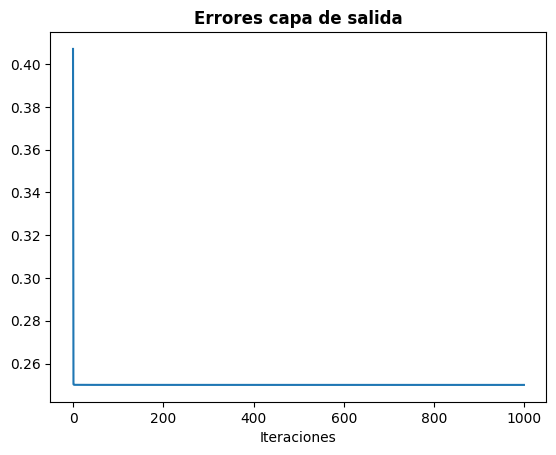

In [7]:
plt.plot(errores_2)
plt.title("Errores capa de salida", weight = "bold")
plt.xlabel("Iteraciones")
plt.show()

### 4 variables de entrada

In [8]:
x4 = list( product( [0,1],repeat = 4 ) )
x4 = np.array(x4) # Matrix 16x4 (P,Si)

z4 = np.mod(np.sum(x4, axis=1), 2) # Matriz de paridad
z4 = np.array(z4).reshape(-1,1) # Matriz 16x1 (P,So)

In [9]:
# P = 16, Si = 4, Sh = 3 (a eleccion, probar distintos valores) , So = 1
Y0_4 = np.zeros((16,5)) # (P,Si+1)
Y1_4 = np.zeros((16,4)) # (P,Sh+1)
Y2_4 = np.zeros((16,1)) # (P,So)

np.random.seed(20)
W1_4 = np.random.normal(0,0.1,(5,3)) # (Si+1,Sh)
W2_4 = np.random.normal(0,0.1,(4,1)) # (Sh+1,So)

In [10]:
Y0_4[:] = bias_add(x4)
Y1_4[:] = bias_add( sigmoid(np.dot( Y0_4,W1_4 )) ) # Probar distintas funciones de activacion 
Y2_4[:] = sigmoid( np.dot( Y1_4, W2_4 ) ) # Probar distintas funciones de activacion

E2_4 = z4 - Y2_4
dy2_4 = Y2_4*(1-Y2_4) # Cambiar derivada al cambiar funcion de activacion
D2_4 = E2_4*dy2_4
eps_4 = 0.07
delta_W2_4 = eps_4*np.dot(Y1_4.T,D2_4)

E1_4 = np.dot(D2_4,W2_4.T)
dy1_4 = Y1_4*(1-Y1_4) # Cambiar derivada al cambiar funcion de activacion
D1_4 = bias_sub(E1_4*dy1_4)
delta_W1_4 = eps_4*np.dot(Y0_4.T,D1_4)

W1_4 += eps_4*delta_W1_4
W2_4 += eps_4*delta_W2_4

In [11]:
error_4 = np.mean( np.square(E2_4))
error_4

0.25000574630351724

In [12]:
iter = 0
errores_4 = []
while error_4 > 0.01 and iter < 999:

    Y1_4[:] = bias_add( sigmoid(np.dot( Y0_4,W1_4 )) ) # Probar distintas funciones de activacion 
    Y2_4[:] = sigmoid( np.dot( Y1_4, W2_4 ) ) # Probar distintas funciones de activacion

    E2_4 = z4 - Y2_4
    dy2_4 = Y2_4*(1-Y2_4) # Cambiar derivada al cambiar funcion de activacion
    D2_4 = E2_4*dy2_4
    delta_W2_4 = eps_4*np.dot(Y1_4.T,D2_4)

    E1_4 = np.dot(D2_4,W2_4.T)
    dy1_4 = Y1_4*(1-Y1_4) # Cambiar derivada al cambiar funcion de activacion
    D1_4 = bias_sub(E1_4*dy1_4)
    delta_W1_4 = eps_4*np.dot(Y0_4.T,D1_4)
        
    W1_4 += eps_4*delta_W1_4
    W2_4 += eps_4*delta_W2_4

    error_4 = np.mean( np.square(E2_4))
    errores_4.append(error_4)

    iter += 1
    
    if iter % 100 == 0: print(error_4,iter)

0.25000114646376725 100
0.25000037886251575 200
0.25000025068261883 300
0.25000022917533804 400
0.250000225463037 500
0.25000022471930045 600
0.25000022447086345 700
0.2500002243051515 800
0.25000022415334144 900


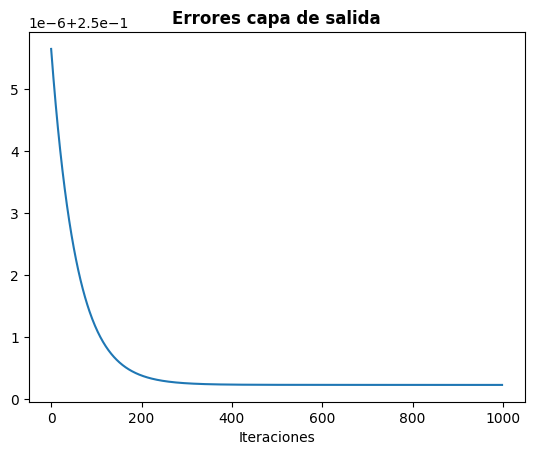

In [13]:
plt.plot(errores_4)
plt.title("Errores capa de salida", weight = "bold")
plt.xlabel("Iteraciones")
plt.show()

### 8 variables de entrada

In [14]:
x8 = list( product( [0,1],repeat = 8 ) )
x8 = np.array(x8) # Matrix 256x8 (P,Si)

z8 = np.mod(np.sum(x8, axis=1), 2) # Matriz de paridad
z8 = np.array(z8).reshape(-1,1) # Matriz 256x1 (P,So)

In [15]:
# P = 256, Si = 8, Sh = 3 (a eleccion, probar distintos valores) , So = 1
Y0_8 = np.zeros((256,9)) # (P,Si+1)
Y1_8 = np.zeros((256,4)) # (P,Sh+1)
Y2_8 = np.zeros((256,1)) # (P,So)

np.random.seed(20)
W1_8 = np.random.normal(0,0.1,(9,3)) # (Si+1,Sh)
W2_8 = np.random.normal(0,0.1,(4,1)) # (Sh+1,So)

In [16]:
Y0_8[:] = bias_add(x8)
Y1_8[:] = bias_add( sigmoid(np.dot( Y0_8,W1_8 )) ) # Probar distintas funciones de activacion 
Y2_8[:] = sigmoid( np.dot( Y1_8, W2_8 ) ) # Probar distintas funciones de activacion

E2_8 = z8 - Y2_8
dy2_8 = Y2_8*(1-Y2_8) # Cambiar derivada al cambiar funcion de activacion
D2_8 = E2_8*dy2_8
eps_8 = 0.05
delta_W2_8 = eps_8*np.dot(Y1_8.T,D2_8)

E1_8 = np.dot(D2_8,W2_8.T)
dy1_8 = Y1_8*(1-Y1_8) # Cambiar derivada al cambiar funcion de activacion
D1_8 = bias_sub(E1_8*dy1_8)
delta_W1_8 = eps_8*np.dot(Y0_8.T,D1_8)

W1_8 += eps_8*delta_W1_8
W2_8 += eps_8*delta_W2_8

In [17]:
error_8 = np.mean( np.square(E2_8))
error_8

0.25022130459211206

In [18]:
iter = 0
errores_8 = []
while error_8 > 0.01 and iter < 999:
    Y0_8[:] = bias_add(x8)
    Y1_8[:] = bias_add( sigmoid(np.dot( Y0_8,W1_8 )) ) # Probar distintas funciones de activacion 
    Y2_8[:] = sigmoid( np.dot( Y1_8, W2_8 ) ) # Probar distintas funciones de activacion

    E2_8 = z8 - Y2_8
    dy2_8 = Y2_8*(1-Y2_8) # Cambiar derivada al cambiar funcion de activacion
    D2_8 = E2_8*dy2_8
    eps_8 = 0.05
    delta_W2_8 = eps_8*np.dot(Y1_8.T,D2_8)

    E1_8 = np.dot(D2_8,W2_8.T)
    dy1_8 = Y1_8*(1-Y1_8) # Cambiar derivada al cambiar funcion de activacion
    D1_8 = bias_sub(E1_8*dy1_8)
    delta_W1_8 = eps_8*np.dot(Y0_8.T,D1_8)
    
    W1_8 += eps_8*delta_W1_8
    W2_8 += eps_8*delta_W2_8

    error_8 = np.mean( np.square(E2_8))
    errores_8.append(error_8)
    iter += 1
    
    if iter % 100 == 0: print(error_4,iter)

0.2500002240054427 100
0.2500002240054427 200
0.2500002240054427 300
0.2500002240054427 400
0.2500002240054427 500
0.2500002240054427 600
0.2500002240054427 700
0.2500002240054427 800
0.2500002240054427 900


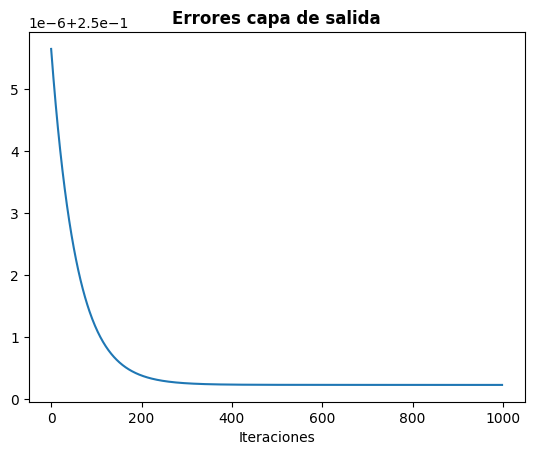

In [19]:
plt.plot(errores_4)
plt.title("Errores capa de salida", weight = "bold")
plt.xlabel("Iteraciones")
plt.show()

Por alguna razon el error casi que no baja. Se usaron ReLu, Sigmoid, Tanh y ninguno parece funcionar. Ademas se cambio el learning rate, y la cantidad de unidades de la capa oculta y tampoco hubo cambio... Que sucede?

### 10 variables de entrada
analogo...